In [27]:
import requests
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

def get_covid_data(start_date, end_date):
    covid_data = []

    # Lop over range of date 
    current_date = start_date

    while (current_date <= end_date):
        formatted_date = current_date.strftime('%Y-%m-%d')

        # API URL
        url = "https://covid-api.com/api/reports/total"
        
        # Parameters for the API request
        params = {
            "date": formatted_date,
            "iso": "SGP"
        }
        
        # Make the request to the API
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            data = response.json().get("data", {})
            confirmed = data.get("confirmed", "0")
            covid_data.append({"date": formatted_date, "confirmed": confirmed})
            print(formatted_date, confirmed)
        else:
            print(f"Error: {response.status_code}")
            print(response.text)

        current_date += relativedelta(months=1)

    return covid_data


start_date = datetime(2020, 2, 1)
end_date = datetime(2023, 3, 1)

data = get_covid_data(start_date, end_date)

2020-02-01 16
2020-03-01 106
2020-04-01 1000
2020-05-01 17101
2020-06-01 35292
2020-07-01 44122
2020-08-01 52512
2020-09-01 56852
2020-10-01 57784
2020-11-01 58019
2020-12-01 58228
2021-01-01 58629
2021-02-01 59565
2021-03-01 59948
2021-04-01 60407
2021-05-01 61179
2021-06-01 62069
2021-07-01 62589
2021-08-01 65102
2021-09-01 67800
2021-10-01 99430
2021-11-01 200844
2021-12-01 266049
2022-01-01 279861
2022-02-01 359075
2022-03-01 748504
2022-04-01 1101438
2022-05-01 1193250
2022-06-01 1310616
2022-07-01 1453155
2022-08-01 1718765
2022-09-01 1841288
2022-10-01 1911417
2022-11-01 2108024
2022-12-01 2169201
2023-01-01 2202756
2023-02-01 2217575
2023-03-01 2230868


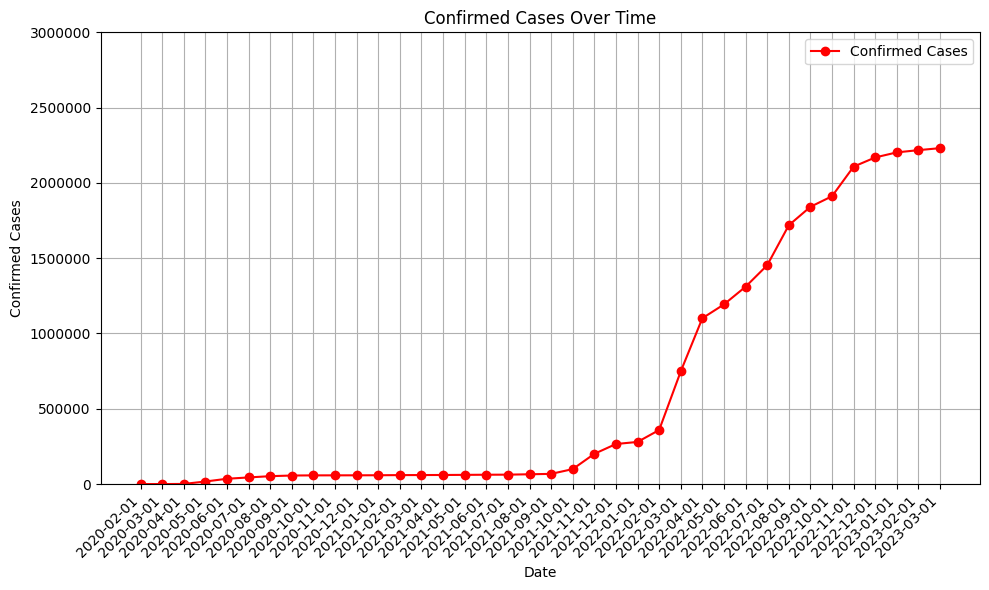

In [28]:
# import plot lib
import matplotlib.pyplot as plt
import random

# extract X and Y
dates = [entry["date"] for entry in data]
values = [entry["confirmed"] for entry in data]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o', color='r', linestyle='-', label="Confirmed Cases")

# Customizing the plot
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45, ha='right')  # Rotate the date labels for better readability
plt.ylim(0, 3000000)
plt.ticklabel_format(style="plain", axis="y")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()
